In [1]:
## Python
from cesium import datasets
eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


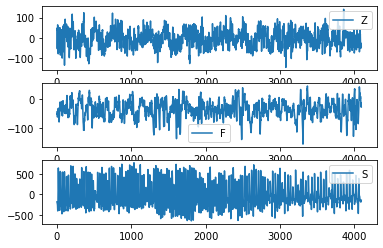

In [2]:
import matplotlib.pyplot as plt
plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.legend(eeg['classes'][0])
plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.legend(eeg['classes'][300])
plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.legend(eeg['classes'][450])

In [3]:
from cesium import featurize as ft
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                  "skew",
                  "max_slope"]
fset_cesium = ft.featurize_time_series(times=eeg["times"],
                                              values=eeg["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use,
                                             scheduler = None)


In [4]:
fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     fset_cesium.iloc[:, 1:6].values, eeg["classes"], random_state=21)



In [6]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth = 3,
                                random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [7]:
rf_clf.score(X_test, y_test) 

0.536

In [8]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                            max_depth = 3,
                            random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)


0.6

In [9]:
import time

start = time.time()
xgb_clf.fit(X_train, y_train)
end = time.time()
print(end - start)

## Las losowy
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
print(end - start)


0.020621061325073242
0.021859169006347656


In [10]:
## Taka sama liczba drzew (10), ale mniejsza maksymalna ich głębokość
## (max_depth = 2)

## XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                            max_depth = 2,
                            random_state = 21)
xgb_clf.fit(X_train, y_train)
print(xgb_clf.score(X_test, y_test))


## Las losowy
rf_clf = RandomForestClassifier(n_estimators = 10,
                                    max_depth = 2,
                                    random_state = 21)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))


0.536
0.52


In [21]:
## Python
## Taka sama liczba drzew (10), ale mniejsza maksymalna ich głębokość
## (max_depth = 1)

## XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                            max_depth = 1,
                            random_state = 21)
xgb_clf.fit(X_train, y_train)
print(xgb_clf.score(X_test, y_test))


## Las losowy
rf_clf = RandomForestClassifier(n_estimators = 10,
                                    max_depth = 1,
                                    random_state = 21)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

0.504
0.368
